In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
# import pandas library
import pandas as pd

# Read the dataset

In [24]:
file = 'https://proai-datasets.s3.eu-west-3.amazonaws.com/housing.csv'

# read the data through pandas read_csv function
df = pd.read_csv(file)

# head shows a snapshot of data contained in the dataset
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,2
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1


In [25]:
# info allows you to view some information about the dataset such as datatypes and nullable columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    int64
 6   guestroom         545 non-null    int64
 7   basement          545 non-null    int64
 8   hotwaterheating   545 non-null    int64
 9   airconditioning   545 non-null    int64
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    int64
 12  furnishingstatus  545 non-null    int64
dtypes: int64(13)
memory usage: 55.5 KB


There are no categorical variables.
All variables are numeric and furnishingstatus is an ordinal categorical variable, but it is already standardized because it contains only numeric values.

# Check missing data

In [26]:
# count all missing data for all columns
df.isna().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


No missing data

In [27]:
df_enc = pd.get_dummies(df, columns=[
    'mainroad', 'guestroom', 'basement',
    'hotwaterheating', 'airconditioning',
    'prefarea', 'furnishingstatus'], drop_first=True)

# Standardization

Since I will then have to implement the Ridge, Lasso and ElasticNet regression models, I use Standardization as it is recommended for data preprocessing of the data to be input to these models

In [28]:
# import StandardScaler class from sklearn library
from sklearn.preprocessing import StandardScaler

In [31]:
# create and object StandardScaler
ss = StandardScaler()

# fit_transform first calculates mean and std through fit and then standardizes each column through tranform
df_enc_std = ss.fit_transform(df_enc)

In [35]:
import numpy as np

In [39]:
import seaborn as sns

In [36]:
df_enc_std = pd.DataFrame(df_enc_std)

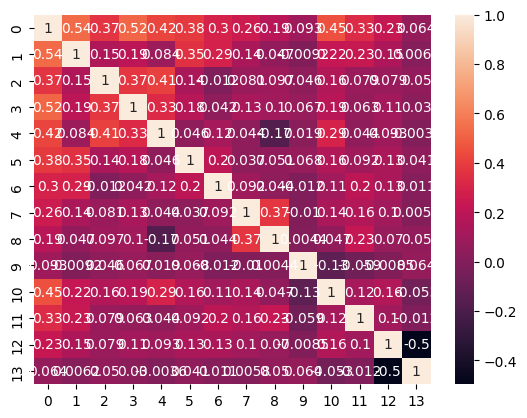

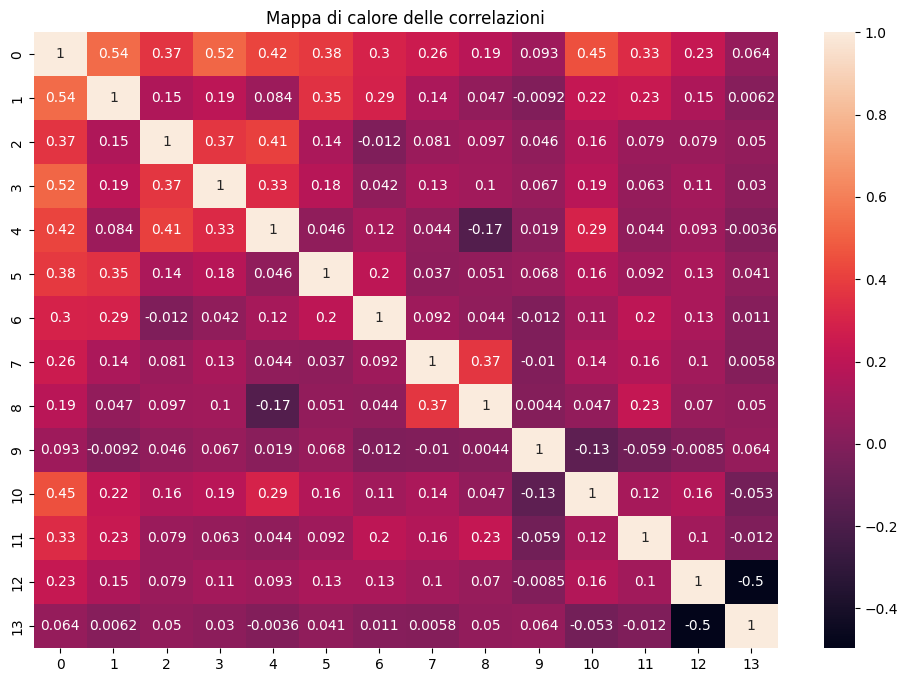

In [41]:
sns.heatmap(df_enc_std.corr(), annot=True)

plt.figure(figsize=(12, 8))  # imposta larghezza=12, altezza=8
sns.heatmap(df_enc_std.corr(), annot=True)

plt.title("Mappa di calore delle correlazioni")
plt.show()

In [29]:
# create dataframe x removing 'price' column (target)
x = df_enc.drop('price', axis=1).values

# create dataframe y keeping only 'price' column (target)
y = df_enc['price'].values

print(x.shape, y.shape)

(545, 13) (545,)


In [30]:
# create and object StandardScaler
ss = StandardScaler()

# fit_transform first calculates mean and std through fit and then standardizes each column through tranform
x_std = ss.fit_transform(x)
y_std = ss.fit_transform(y)

# print mean and standard deviation
print(f'Mean {x_std.mean():.2f}')
print(f'Standard Deviation {x_std.std():.2f}')

ValueError: Expected 2D array, got 1D array instead:
array=[13300000. 12250000. 12250000. 12215000. 11410000. 10850000. 10150000.
 10150000.  9870000.  9800000.  9800000.  9681000.  9310000.  9240000.
  9240000.  9100000.  9100000.  8960000.  8890000.  8855000.  8750000.
  8680000.  8645000.  8645000.  8575000.  8540000.  8463000.  8400000.
  8400000.  8400000.  8400000.  8400000.  8295000.  8190000.  8120000.
  8080940.  8043000.  7980000.  7962500.  7910000.  7875000.  7840000.
  7700000.  7700000.  7560000.  7560000.  7525000.  7490000.  7455000.
  7420000.  7420000.  7420000.  7350000.  7350000.  7350000.  7350000.
  7343000.  7245000.  7210000.  7210000.  7140000.  7070000.  7070000.
  7035000.  7000000.  6930000.  6930000.  6895000.  6860000.  6790000.
  6790000.  6755000.  6720000.  6685000.  6650000.  6650000.  6650000.
  6650000.  6650000.  6650000.  6629000.  6615000.  6615000.  6580000.
  6510000.  6510000.  6510000.  6475000.  6475000.  6440000.  6440000.
  6419000.  6405000.  6300000.  6300000.  6300000.  6300000.  6300000.
  6293000.  6265000.  6230000.  6230000.  6195000.  6195000.  6195000.
  6160000.  6160000.  6125000.  6107500.  6090000.  6090000.  6090000.
  6083000.  6083000.  6020000.  6020000.  6020000.  5950000.  5950000.
  5950000.  5950000.  5950000.  5950000.  5950000.  5950000.  5943000.
  5880000.  5880000.  5873000.  5873000.  5866000.  5810000.  5810000.
  5810000.  5803000.  5775000.  5740000.  5740000.  5740000.  5740000.
  5740000.  5652500.  5600000.  5600000.  5600000.  5600000.  5600000.
  5600000.  5600000.  5600000.  5600000.  5565000.  5565000.  5530000.
  5530000.  5530000.  5523000.  5495000.  5495000.  5460000.  5460000.
  5460000.  5460000.  5425000.  5390000.  5383000.  5320000.  5285000.
  5250000.  5250000.  5250000.  5250000.  5250000.  5250000.  5250000.
  5250000.  5250000.  5243000.  5229000.  5215000.  5215000.  5215000.
  5145000.  5145000.  5110000.  5110000.  5110000.  5110000.  5075000.
  5040000.  5040000.  5040000.  5040000.  5033000.  5005000.  4970000.
  4970000.  4956000.  4935000.  4907000.  4900000.  4900000.  4900000.
  4900000.  4900000.  4900000.  4900000.  4900000.  4900000.  4900000.
  4900000.  4900000.  4893000.  4893000.  4865000.  4830000.  4830000.
  4830000.  4830000.  4795000.  4795000.  4767000.  4760000.  4760000.
  4760000.  4753000.  4690000.  4690000.  4690000.  4690000.  4690000.
  4690000.  4655000.  4620000.  4620000.  4620000.  4620000.  4620000.
  4613000.  4585000.  4585000.  4550000.  4550000.  4550000.  4550000.
  4550000.  4550000.  4550000.  4543000.  4543000.  4515000.  4515000.
  4515000.  4515000.  4480000.  4480000.  4480000.  4480000.  4480000.
  4473000.  4473000.  4473000.  4445000.  4410000.  4410000.  4403000.
  4403000.  4403000.  4382000.  4375000.  4340000.  4340000.  4340000.
  4340000.  4340000.  4319000.  4305000.  4305000.  4277000.  4270000.
  4270000.  4270000.  4270000.  4270000.  4270000.  4235000.  4235000.
  4200000.  4200000.  4200000.  4200000.  4200000.  4200000.  4200000.
  4200000.  4200000.  4200000.  4200000.  4200000.  4200000.  4200000.
  4200000.  4200000.  4200000.  4193000.  4193000.  4165000.  4165000.
  4165000.  4130000.  4130000.  4123000.  4098500.  4095000.  4095000.
  4095000.  4060000.  4060000.  4060000.  4060000.  4060000.  4025000.
  4025000.  4025000.  4007500.  4007500.  3990000.  3990000.  3990000.
  3990000.  3990000.  3920000.  3920000.  3920000.  3920000.  3920000.
  3920000.  3920000.  3885000.  3885000.  3850000.  3850000.  3850000.
  3850000.  3850000.  3850000.  3850000.  3836000.  3815000.  3780000.
  3780000.  3780000.  3780000.  3780000.  3780000.  3773000.  3773000.
  3773000.  3745000.  3710000.  3710000.  3710000.  3710000.  3710000.
  3703000.  3703000.  3675000.  3675000.  3675000.  3675000.  3640000.
  3640000.  3640000.  3640000.  3640000.  3640000.  3640000.  3640000.
  3640000.  3633000.  3605000.  3605000.  3570000.  3570000.  3570000.
  3570000.  3535000.  3500000.  3500000.  3500000.  3500000.  3500000.
  3500000.  3500000.  3500000.  3500000.  3500000.  3500000.  3500000.
  3500000.  3500000.  3500000.  3500000.  3500000.  3493000.  3465000.
  3465000.  3465000.  3430000.  3430000.  3430000.  3430000.  3430000.
  3430000.  3423000.  3395000.  3395000.  3395000.  3360000.  3360000.
  3360000.  3360000.  3360000.  3360000.  3360000.  3360000.  3353000.
  3332000.  3325000.  3325000.  3290000.  3290000.  3290000.  3290000.
  3290000.  3290000.  3290000.  3290000.  3255000.  3255000.  3234000.
  3220000.  3220000.  3220000.  3220000.  3150000.  3150000.  3150000.
  3150000.  3150000.  3150000.  3150000.  3150000.  3150000.  3143000.
  3129000.  3118850.  3115000.  3115000.  3115000.  3087000.  3080000.
  3080000.  3080000.  3080000.  3045000.  3010000.  3010000.  3010000.
  3010000.  3010000.  3010000.  3010000.  3003000.  2975000.  2961000.
  2940000.  2940000.  2940000.  2940000.  2940000.  2940000.  2940000.
  2940000.  2870000.  2870000.  2870000.  2870000.  2852500.  2835000.
  2835000.  2835000.  2800000.  2800000.  2730000.  2730000.  2695000.
  2660000.  2660000.  2660000.  2660000.  2660000.  2660000.  2660000.
  2653000.  2653000.  2604000.  2590000.  2590000.  2590000.  2520000.
  2520000.  2520000.  2485000.  2485000.  2450000.  2450000.  2450000.
  2450000.  2450000.  2450000.  2408000.  2380000.  2380000.  2380000.
  2345000.  2310000.  2275000.  2275000.  2275000.  2240000.  2233000.
  2135000.  2100000.  2100000.  2100000.  1960000.  1890000.  1890000.
  1855000.  1820000.  1767150.  1750000.  1750000.  1750000.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [7]:
import matplotlib.pyplot as plt

In [9]:
x_val = x.values
y_val = y.values

In [43]:
plt.plot(x['area'], y_val)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

# Linear Regression

In [12]:
# import train_test_split class from sklearn library
from sklearn.model_selection import train_test_split

Random seed is a value that is set to make the results reproducible when using functions that involve random numbers. This allows, at each run, to have the same data both in the training phase and in the testing phase so as to be able to compare the different models applied to the data

In [13]:
random_seed = 0

In [14]:
# split dataset in two parts: train and test
# assign 30% of the data to the test set and the remaining to the training set
# apply random_seed
x_train, x_test, y_train, y_test = train_test_split(
    x_std,
    y,
    test_size=.3,
    random_state=random_seed
    )

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(381, 13) (164, 13) (381,) (164,)


Apply standardization to train and test dataset so that all variables contribute equally to the regression and regularization (for example area may have too large values than bathrooms or bedrooms but it' not more important)

In [15]:
# apply standardization to train and test dataset so that all variables contribute equally to the regression and regularization
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

In [16]:
# import mean_squared_error and r2_score metrics from sklearn library
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# import numpy library
import numpy as np

In [ ]:
# create a evaluate_model function that:
def evaluate_model(model, dataset):

  # assign features dataset to x and target values dataset to y
  x, y = dataset

  # make predictions based on dataset features
  y_pred = model.predict(x)

  # calculate and print RMSE, rounded to 3 decimal places
  print(f'RMSE: {np.sqrt(mean_squared_error(y, y_pred)):.3f}')
  # calculate and print MSE, rounded to 3 decimal places
  print(f'MSE: {mean_squared_error(y, y_pred):.3f}')
  # calculate and print R2, rounded to 3 decimal places
  print(f'R2: {r2_score(y, y_pred):.3f}')
  # calculate non-zero coefficients as the ratio of the non-zero coefficients of the model to the total
  print(f'Non-zero coefficients: {np.sum(model.coef_ != 0) / len(model.coef_)}')

In [ ]:
print("Numero di feature:", x_train.shape[1])
print("Lunghezza dei coefficienti:", len(model.coef_))
print("Coefficiente non nulli:", np.sum(model.coef_ != 0))


Numero di feature: 13
Lunghezza dei coefficienti: 13
Coefficiente non nulli: 13


In [ ]:
model.coef_

array([478386.53381877,  86896.49574783, 444993.21167143, 308436.1655397 ,
       171033.421595  , 106045.66072825, 105725.86485842, 106121.05219287,
       154363.9041883 , 365966.73449702, 257609.89909976,  59979.80524448,
        19675.74370274])

In [ ]:
# import LinearRegression class from sklearn library
from sklearn.linear_model import LinearRegression

In [ ]:
# create and object LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
# evaluate the performance of Linear Regression model on train and test set
evaluate_model(lr, (x_train, y_train))
evaluate_model(lr, (x_test, y_test))

RMSE: 1092476.579
MSE: 1193505076004.693
R2: 0.659
Non-zero coefficients: 1.0
RMSE: 977460.415
MSE: 955428862101.250
R2: 0.725
Non-zero coefficients: 1.0


## Regularization models

### Ridge

#### alpha .01

In [ ]:
# import Ridge class from sklearn library
from sklearn.linear_model import Ridge

In [ ]:
# fit and evaluate the performance of Ridge regression with alpha=.01 on train and test set
model = Ridge(alpha=.01)

model.fit(x_train, y_train)

evaluate_model(model, (x_train, y_train))
evaluate_model(model, (x_test, y_test))

RMSE: 1870316.925
MSE: 3498085400693.708
R2: 0.001
Non-zero coefficients: 1.0
RMSE: 1861240.157
MSE: 3464214920877.432
R2: 0.001
Non-zero coefficients: 1.0


#### alpha .5

In [ ]:
# fit and evaluate the performance of Ridge regression with alpha=.5 on train and test set
model = Ridge(alpha=.5)

model.fit(x_train, y_train)

evaluate_model(model, (x_train, y_train))
evaluate_model(model, (x_test, y_test))

RMSE: 1092477.154
MSE: 1193506332469.407
R2: 0.659
Non-zero coefficients: 1.0
RMSE: 977341.368
MSE: 955196150144.620
R2: 0.725
Non-zero coefficients: 1.0


#### alpha 1

In [ ]:
# fit and evaluate the performance of Ridge regression with alpha=1 on train and test set
model = Ridge(alpha=1)

model.fit(x_train, y_train)

evaluate_model(model, (x_train, y_train))
evaluate_model(model, (x_test, y_test))

RMSE: 1092478.873
MSE: 1193510087731.759
R2: 0.659
Non-zero coefficients: 1.0
RMSE: 977224.369
MSE: 954967467867.362
R2: 0.725
Non-zero coefficients: 1.0


#### alpha 10

In [ ]:
# fit and evaluate the performance of Ridge regression with alpha=1 on train and test set
model = Ridge(alpha=10)

model.fit(x_train, y_train)

evaluate_model(model, (x_train, y_train))
evaluate_model(model, (x_test, y_test))

RMSE: 1092694.936
MSE: 1193982222992.118
R2: 0.659
Non-zero coefficients: 1.0
RMSE: 975450.867
MSE: 951504394124.570
R2: 0.726
Non-zero coefficients: 1.0


Changing the *alpha* parameter does not substantially change the metrics

### Lasso

In [ ]:
# import Lasso class from sklearn library
from sklearn.linear_model import Lasso

#### alpha 0.01

In [ ]:
# fit and evaluate the performance of Lasso regression with alpha=.01 on train and test set
model = Lasso(alpha=.01)

model.fit(x_train, y_train)

evaluate_model(model, (x_train, y_train))
evaluate_model(model, (x_test, y_test))

RMSE: 1092476.579
MSE: 1193505076004.694
R2: 0.659
Non-zero coefficients: 1.0
RMSE: 977460.410
MSE: 955428853430.027
R2: 0.725
Non-zero coefficients: 1.0


#### alpha .5

In [ ]:
# fit and evaluate the performance of Lasso regression with alpha=.5 on train and test set
model = Lasso(alpha=.5)

model.fit(x_train, y_train)

evaluate_model(model, (x_train, y_train))
evaluate_model(model, (x_test, y_test))

RMSE: 1092476.579
MSE: 1193505076006.623
R2: 0.659
Non-zero coefficients: 1.0
RMSE: 977460.198
MSE: 955428438038.474
R2: 0.725
Non-zero coefficients: 1.0


#### alpha 1

In [ ]:
# fit and evaluate the performance of Lasso regression with alpha=1 on train and test set
model = Lasso(alpha=1)

model.fit(x_train, y_train)

evaluate_model(model, (x_train, y_train))
evaluate_model(model, (x_test, y_test))

RMSE: 1092476.579
MSE: 1193505076012.438
R2: 0.659
Non-zero coefficients: 1.0
RMSE: 977459.984
MSE: 955428019727.901
R2: 0.725
Non-zero coefficients: 1.0


#### alpha 10

In [ ]:
# fit and evaluate the performance of Lasso regression with alpha=10 on train and test set
model = Lasso(alpha=10000)

model.fit(x_train, y_train)

evaluate_model(model, (x_train, y_train))
evaluate_model(model, (x_test, y_test))

RMSE: 1092829.034
MSE: 1194275297734.162
R2: 0.659
Non-zero coefficients: 1.0
RMSE: 973512.425
MSE: 947726441429.151
R2: 0.727
Non-zero coefficients: 1.0


### ElasticNet

ElasticNet combines Ridge and Lasso

In [ ]:
# import ElasticNet class from sklearn library
from sklearn.linear_model import ElasticNet

#### alpha .01 ratio 0.5

In [ ]:
# fit and evaluate the performance of ElasticNet regression with alpha=.01 and ratio 0.5 on train and test set
# ratio = 0.5 means that the weights of Ridge and Lasso are the same
model = ElasticNet(alpha=.01, l1_ratio=0.5)

model.fit(x_train, y_train)

evaluate_model(model, (x_train, y_train))
evaluate_model(model, (x_test, y_test))

RMSE: 1097701.139
MSE: 1204947790316.926
R2: 0.656
Non-zero coefficients: 1.0
RMSE: 980326.918
MSE: 961040865989.063
R2: 0.723
Non-zero coefficients: 1.0


#### alpha .01 ratio 0

In [ ]:
# fit and evaluate the performance of ElasticNet regression with alpha=.01 and ratio 0 on train and test set
# ratio = 0 means that the algorithm is using Ridge (L2)
model = ElasticNet(alpha=.01, l1_ratio=0)

model.fit(x_train, y_train)

evaluate_model(model, (x_train, y_train))
evaluate_model(model, (x_test, y_test))

RMSE: 1097724.157
MSE: 1204998324567.830
R2: 0.656
Non-zero coefficients: 1.0
RMSE: 979922.498
MSE: 960248101782.522
R2: 0.723
Non-zero coefficients: 1.0


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.316e+14, tolerance: 1.334e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


#### alpha .01 ratio 1

In [ ]:
# fit and evaluate the performance of ElasticNet regression with alpha=.01 and ratio 1 on train and test set
# ratio = 1 means that the algorithm is using Lasso (L1)
model = ElasticNet(alpha=.01, l1_ratio=0)

model.fit(x_train, y_train)

evaluate_model(model, (x_train, y_train))
evaluate_model(model, (x_test, y_test))

RMSE: 1097724.157
MSE: 1204998324567.830
R2: 0.656
Non-zero coefficients: 1.0
RMSE: 979922.498
MSE: 960248101782.522
R2: 0.723
Non-zero coefficients: 1.0


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.316e+14, tolerance: 1.334e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


#### alpha 1 ration 0.5

In [ ]:
# fit and evaluate the performance of ElasticNet regression with alpha=1 and ratio 0.5 on train and test set
model = ElasticNet(alpha=1, l1_ratio=0.5)

model.fit(x_train, y_train)

evaluate_model(model, (x_train, y_train))
evaluate_model(model, (x_test, y_test))

RMSE: 1137207.205
MSE: 1293240227187.340
R2: 0.631
Non-zero coefficients: 1.0
RMSE: 1008159.096
MSE: 1016384763294.284
R2: 0.707
Non-zero coefficients: 1.0


# Cross-validation

In [ ]:
# import cross_validate class from sklearn
from sklearn.model_selection import cross_validate

Execute cross validation for all previous models

In [ ]:
model = Ridge(alpha=.01)
cv_result = cross_validate(model, x_train, y_train, cv=5, return_train_score=True)
cv_result

{'fit_time': array([0.0021584 , 0.00119019, 0.00112987, 0.0011344 , 0.00117064]),
 'score_time': array([0.00137615, 0.00082254, 0.00076246, 0.00097752, 0.00082207]),
 'test_score': array([0.6185672 , 0.66982592, 0.50907181, 0.64547521, 0.68033661]),
 'train_score': array([0.66345467, 0.64715682, 0.68018779, 0.65419303, 0.64910731])}

In [ ]:
model = Ridge(alpha=.5)
cv_result = cross_validate(model, x_train, y_train, cv=5, return_train_score=True)
cv_result

{'fit_time': array([0.00261021, 0.00332856, 0.00179505, 0.00242329, 0.00269508]),
 'score_time': array([0.00119114, 0.00132775, 0.00109434, 0.00125289, 0.00095749]),
 'test_score': array([0.61852676, 0.66984592, 0.50930166, 0.64551182, 0.68049523]),
 'train_score': array([0.6634541 , 0.64715635, 0.68018727, 0.65419235, 0.64910678])}

In [ ]:
model = Ridge(alpha=1)
cv_result = cross_validate(model, x_train, y_train, cv=5, return_train_score=True)
cv_result

{'fit_time': array([0.00189328, 0.00128889, 0.00174975, 0.00148201, 0.00112486]),
 'score_time': array([0.00096631, 0.00156999, 0.00111961, 0.00082588, 0.00076032]),
 'test_score': array([0.61848449, 0.6698651 , 0.5095346 , 0.6455472 , 0.68065496]),
 'train_score': array([0.66345239, 0.64715494, 0.68018575, 0.65419033, 0.6491052 ])}

In [ ]:
model = Ridge(alpha=10)
cv_result = cross_validate(model, x_train, y_train, cv=5, return_train_score=True)
cv_result

{'fit_time': array([0.00254369, 0.00216341, 0.00276613, 0.00153017, 0.00117588]),
 'score_time': array([0.001302  , 0.00097322, 0.0013051 , 0.00130272, 0.00072503]),
 'test_score': array([0.61756259, 0.67001131, 0.51346222, 0.6458663 , 0.6831867 ]),
 'train_score': array([0.6632399 , 0.64697781, 0.67999445, 0.65394049, 0.6489079 ])}

In [ ]:
model = Lasso(alpha=.01)
cv_result = cross_validate(model, x_train, y_train, cv=5, return_train_score=True)
cv_result

{'fit_time': array([0.00219822, 0.00175333, 0.00240397, 0.00118232, 0.00238633]),
 'score_time': array([0.00117254, 0.00117493, 0.00092196, 0.00116444, 0.0009048 ]),
 'test_score': array([0.61856801, 0.6698255 , 0.5090671 , 0.64547444, 0.68033335]),
 'train_score': array([0.66345468, 0.64715682, 0.68018779, 0.65419303, 0.64910731])}

In [ ]:
model = Lasso(alpha=.5)
cv_result = cross_validate(model, x_train, y_train, cv=5, return_train_score=True)
cv_result

{'fit_time': array([0.00190473, 0.00203013, 0.00235605, 0.00166488, 0.00117135]),
 'score_time': array([0.00210547, 0.00151157, 0.0009439 , 0.00118232, 0.00077629]),
 'test_score': array([0.61856784, 0.66982546, 0.50906729, 0.64547444, 0.68033334]),
 'train_score': array([0.66345468, 0.64715682, 0.68018779, 0.65419303, 0.64910731])}

In [ ]:
model = Lasso(alpha=1)
cv_result = cross_validate(model, x_train, y_train, cv=5, return_train_score=True)
cv_result

{'fit_time': array([0.00206232, 0.00116992, 0.00115252, 0.00122643, 0.00156665]),
 'score_time': array([0.00126457, 0.00105786, 0.00082755, 0.00077367, 0.0008347 ]),
 'test_score': array([0.61856767, 0.66982543, 0.50906747, 0.64547444, 0.6803331 ]),
 'train_score': array([0.66345468, 0.64715682, 0.68018779, 0.65419303, 0.64910731])}

In [ ]:
model = Lasso(alpha=10)
cv_result = cross_validate(model, x_train, y_train, cv=5, return_train_score=True)
cv_result

{'fit_time': array([0.00482988, 0.00118184, 0.00148201, 0.00134611, 0.00140071]),
 'score_time': array([0.00225425, 0.00087047, 0.00082636, 0.00082874, 0.00138998]),
 'test_score': array([0.6185653 , 0.6698248 , 0.5090708 , 0.64547439, 0.68033488]),
 'train_score': array([0.66345468, 0.64715682, 0.68018779, 0.65419303, 0.64910731])}

In [ ]:
model = ElasticNet(alpha=.01, l1_ratio=0.5)
cv_result = cross_validate(model, x_train, y_train, cv=5, return_train_score=True)
cv_result

{'fit_time': array([0.00193048, 0.00453115, 0.00202394, 0.0011549 , 0.00153923]),
 'score_time': array([0.00103545, 0.00130606, 0.00089264, 0.0008533 , 0.0010004 ]),
 'test_score': array([0.61843946, 0.66988392, 0.50977744, 0.64558222, 0.6808204 ]),
 'train_score': array([0.66344942, 0.64715245, 0.68018306, 0.65418677, 0.64910241])}

In [ ]:
model = ElasticNet(alpha=.01, l1_ratio=0)
cv_result = cross_validate(model, x_train, y_train, cv=5, return_train_score=True)
cv_result

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.692e+14, tolerance: 9.961e+10 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.948e+14, tolerance: 1.095e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_mode

{'fit_time': array([0.00757909, 0.00646496, 0.00685573, 0.00654221, 0.00514197]),
 'score_time': array([0.00120783, 0.00326085, 0.00141668, 0.00099897, 0.00098109]),
 'test_score': array([0.61830173, 0.66993103, 0.51047283, 0.64567181, 0.6812879 ]),
 'train_score': array([0.66343388, 0.64713951, 0.68016905, 0.65416829, 0.6490879 ])}

In [ ]:
model = ElasticNet(alpha=.01, l1_ratio=1)
cv_result = cross_validate(model, x_train, y_train, cv=5, return_train_score=True)
cv_result

{'fit_time': array([0.00261164, 0.0014205 , 0.00156403, 0.00148797, 0.00142193]),
 'score_time': array([0.00127149, 0.00098181, 0.0009222 , 0.00089359, 0.00107932]),
 'test_score': array([0.61856801, 0.6698255 , 0.5090671 , 0.64547444, 0.68033335]),
 'train_score': array([0.66345468, 0.64715682, 0.68018779, 0.65419303, 0.64910731])}

In [ ]:
model = ElasticNet(alpha=1, l1_ratio=0.5)
cv_result = cross_validate(model, x_train, y_train, cv=5, return_train_score=True)
cv_result

{'fit_time': array([0.00722837, 0.00120091, 0.00111938, 0.00109792, 0.00110006]),
 'score_time': array([0.00108624, 0.0011673 , 0.00081587, 0.00080824, 0.00079966]),
 'test_score': array([0.58464776, 0.64658376, 0.53632718, 0.61500328, 0.67959417]),
 'train_score': array([0.63705526, 0.62353082, 0.65509814, 0.62527893, 0.62433441])}